# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
# carrega o arquivo .csv

df = pd.read_csv('sinasc_RO_2019.csv', na_values= ['na','9'])

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,NaN,8 a 11 anos,513205.0,2.0,0.0,...,5.0,3.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4.0,4.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,5.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df.shape

(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
# função que categoriza o grau de asfixia com base na coluna APGAR5

def classificao_apgar5(index) -> str:
    
    if index <= 3:
        return 'Asfixia severa'

    if index >= 4 and index <= 5:
        return 'Asfixia moderada'

    if index >= 6 and index <= 7:
        return 'Asfixia leve'

    if index >= 8 and index <= 10:
        return 'Normal'

In [5]:
# excluindo os valores faltantes de APGAR5

df1 = df.dropna(subset=['APGAR5'])

print(df1.shape)

(26925, 69)


In [6]:
# cria a coluna que classifica APGAR5

df1['classif_APGAR5'] = df1['APGAR5'].map(classificao_apgar5)

/tmp/ipykernel_16896/3235779286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['classif_APGAR5'] = df1['APGAR5'].map(classificao_apgar5)


In [7]:
# confere a crição da nova coluna

df1['classif_APGAR5']

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
27023    Normal
27024    Normal
27025    Normal
27026    Normal
27027    Normal
Name: classif_APGAR5, Length: 26925, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [8]:
df2 = df1[['APGAR5', 'SEXO','GESTACAO']]
df2.head()

,APGAR5,SEXO,GESTACAO
0,10.0,Masculino,37 a 41 semanas
1,9.0,Feminino,37 a 41 semanas
2,10.0,Feminino,37 a 41 semanas
3,10.0,Feminino,37 a 41 semanas
4,10.0,Feminino,37 a 41 semanas


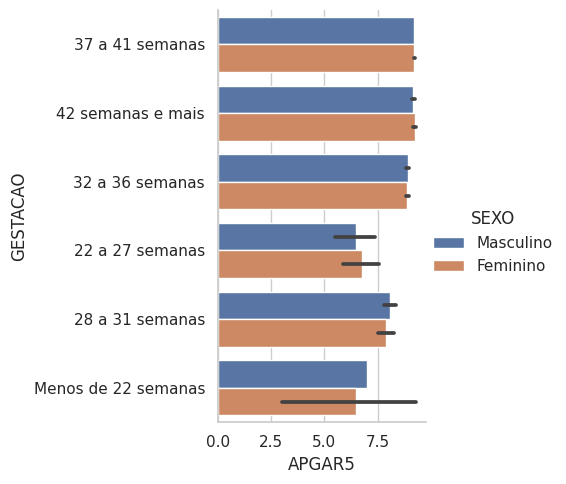

In [9]:
sns.catplot(data=df2,
              x='APGAR5',
              y='GESTACAO',
              hue='SEXO',
              kind='bar')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [10]:
df_cruzada = pd.crosstab(df2['GESTACAO'],df2['APGAR5'])

df_cruzada.head()

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
#calcula o percentual de linhas

print(df_cruzada.sum(axis=1))
print('\n')

pct_linhas = df_cruzada.div(df_cruzada.sum(axis=1), axis=0)
print(pct_linhas)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64


APGAR5                   0.0       1.0       2.0       3.0       4.0   \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   

APGAR5                   5.0       6.0       7.0       8.0       9.0   \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529  

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

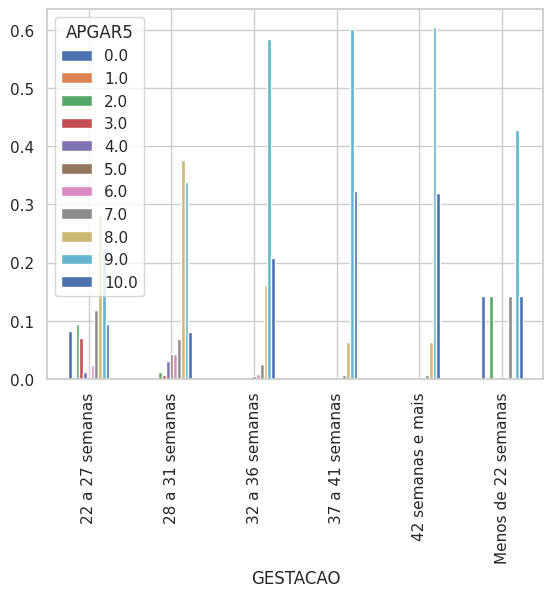

In [12]:
pct_linhas.plot.bar()

Ao observar que abaixo de 36 semanas, o APGAR5 tem seus índices reduzidos. Em especial, no intervalo em torno de 22 semanas, sendo o APGAR5 com os menores valores.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a  melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [16]:
df3 = df[['APGAR5', 'PESO', 'SEXO']]
df3.head()

,APGAR5,PESO,SEXO
0,10.0,3685,Masculino
1,9.0,3055,Feminino
2,10.0,3460,Feminino
3,10.0,2982,Feminino
4,10.0,3310,Feminino


In [26]:
df3['PESO'].describecribe()

count    27028.000000
mean      3243.190654
std        544.754096
min        258.000000
25%       2965.000000
50%       3270.000000
75%       3575.000000
max       5985.000000
Name: PESO, dtype: float64

<AxesSubplot:>

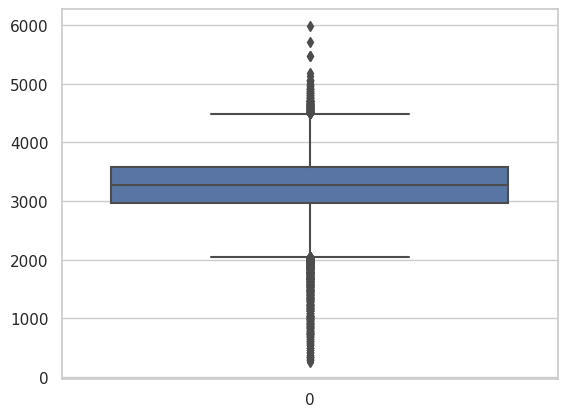

In [27]:
sns.boxplot(df3['PESO'])

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

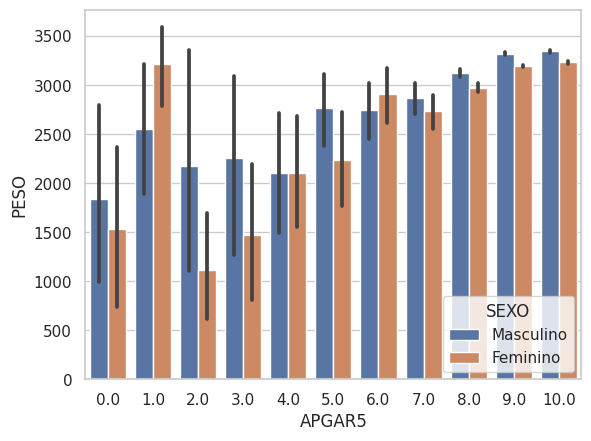

In [25]:
# scatterplot que relaciona 'APGAR5' e o PESO

sns.barplot(data=df3, x='APGAR5', y='PESO', hue='SEXO')

É possível observar que para índices de APGAR5 mais baixos, o peso médio apresenta baixa significativa para APGAR5 < 5. Especialmente para o sexo feminino. Contudo, para APGAR = 1.0, há um pico de peso